In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
prices = pd.read_csv('./data/small_portfolio.csv', index_col='date', parse_dates=True)

# Calculate daily returns in decimal form
returns = prices.pct_change().dropna()

In [29]:
prices_rebased = prices.div(prices.iloc[0]) * 100

In [30]:
weights = np.array([0.25, 0.25, 0.25, 0.25])

<Axes: xlabel='date'>

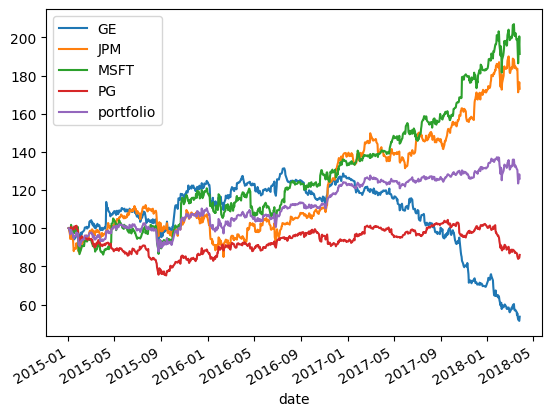

In [31]:
# Invest USD 100 in the portfolio and hold it for the entire period
# compute the number of shares of each stock
initial_investment = 100
shares = initial_investment / prices.iloc[0] * weights
# compute the value of the portfolio each day
portfolio_value = (shares * prices).sum(axis=1)
# compute the daily returns of the portfolio
portfolio_returns = portfolio_value.pct_change().dropna()
returns['portfolio'] = portfolio_returns
returns
prices['Portfolio'] = portfolio_value
prices_rebased['portfolio'] = portfolio_value
prices_rebased.plot()
 


<Axes: xlabel='date'>

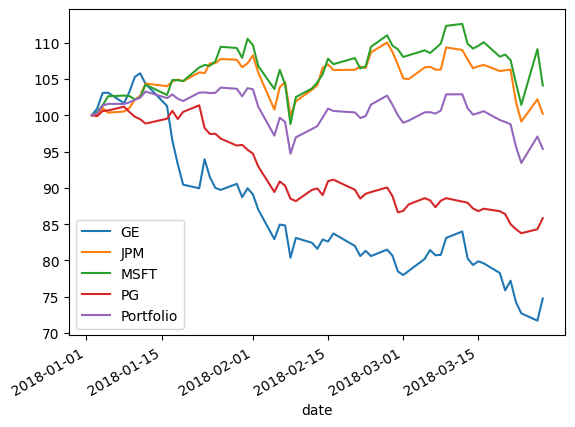

In [32]:
# Calculate the prices rebased to 100 at the start of 2018
prices_rebased_2018 = prices.div(prices.loc['2018-01-02']) * 100
# Plot the prices rebased to 100 at the start of 2018 on a graph from 2018 onwards
prices_rebased_2018['2018':].plot()

In [37]:
#calculate the daily weights of the portfolio for the entire period by dividing the value of each stock by the total value of the portfolio each day
weights = prices.div(portfolio_value, axis=0)
weights



,GE,JPM,MSFT,PG,Portfolio
date,,,,,
2015-01-02,0.250600,0.624900,0.467600,0.904400,1.0
2015-01-05,0.249966,0.615261,0.470718,0.914610,1.0
2015-01-06,0.248702,0.609408,0.471676,0.925787,1.0
2015-01-07,0.247562,0.607288,0.475282,0.925994,1.0
2015-01-08,0.245919,0.609399,0.480233,0.919295,1.0
...,...,...,...,...,...
2018-03-21,0.106368,0.879301,0.708713,0.590390,1.0
2018-03-22,0.105590,0.869633,0.710181,0.604354,1.0
2018-03-23,0.105878,0.866875,0.706234,0.614938,1.0
